In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = datasets.load_iris()

In [4]:
X = iris.data # features of the flower
Y = iris.target # Class of the flower

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names # Types of Irises - represented in the dataset as setosa - 0, versicolor - 1, virginica - 2

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [8]:
iris.feature_names # The features of the flowers in each column

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Plotting the ground truth

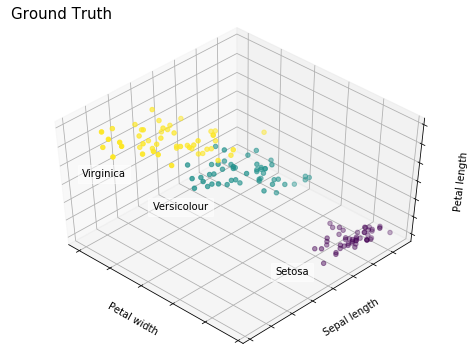

In [9]:
#Plot dataset as is

fig = plt.figure(figsize=(8, 6)) # Instantiate a Matplotlib figure width 8 inches, height 6 inches
plt.clf()
ax1 = plt.axes(projection='3d', elev=48, azim=134) # Create an Axes3D object that can plot the data in 3D
# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax1.text3D(X[Y == label, 3].mean(), # Position of the text 'Setosa' is at the mean of all X's that are classified as 0
              X[Y == label, 0].mean() + 1.5, # Position of the text 'Versicolor' is at the mean of all X's that are classified as 1 plus 1.5 to adjust the text visually
              X[Y == label, 2].mean(), # Position of the text 'Virginica' is at the mean of all X's that are classified as 2
              name, 
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w')) 

ax1.scatter3D(X[:, 3], X[:, 0], X[:, 2], c = Y) # X -> Petal Width, Y -> Sepal Length, Z -> Petal Length
ax1.w_xaxis.set_ticklabels([]) # Remove the numerical markers along the axes
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])
ax1.set_xlabel('Petal width')
ax1.set_ylabel('Sepal length')
ax1.set_zlabel('Petal length')
ax1.set_title('Ground Truth', loc='left', fontsize=15)
plt.show()

### Test K Means with 3 cluster centroids and allow all default options
When the argument **n_init** is not specified, the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia.

In [10]:
three_k = KMeans(n_clusters=3) # Initialize a K Means estimator

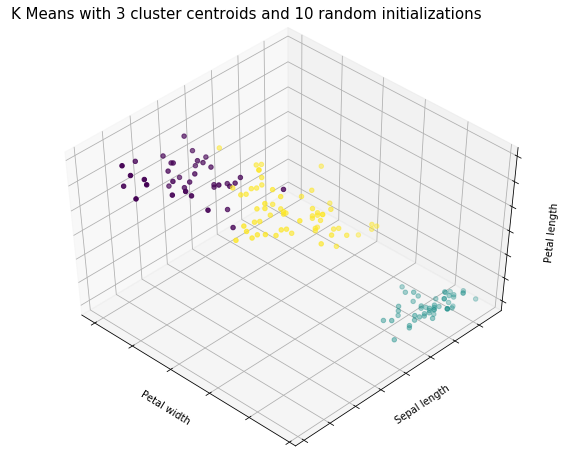

In [11]:
fig = plt.figure(figsize=(8, 6))
plt.clf() # Clear figure
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla() # Clear axes
three_k.fit(X)
labels = three_k.labels_

ax2.scatter3D(X[:, 3], X[:, 0], X[:, 2], c = labels.astype(np.float))
ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_xlabel('Petal width')
ax2.set_ylabel('Sepal length')
ax2.set_zlabel('Petal length')
ax2.set_title('K Means with 3 cluster centroids and 10 random initializations', loc='left', fontsize=15)
plt.show()

Not too far off from the ground truth!

### K Means with 8 cluster centroids

In [12]:
eight_k = KMeans(n_clusters=8)

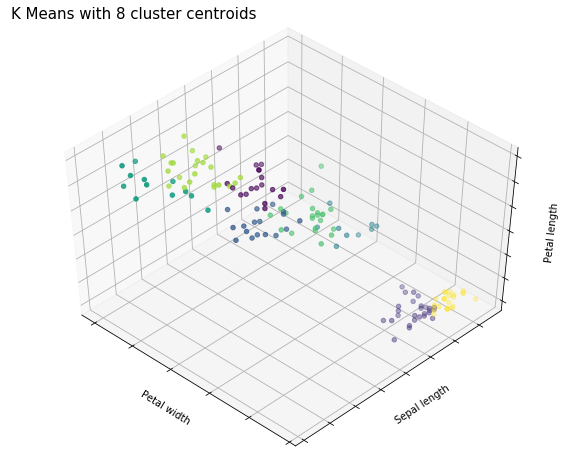

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.clf()
ax3 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
eight_k.fit(X)
labels = eight_k.labels_

ax3.scatter3D(X[:, 3], X[:, 0], X[:, 2], c = labels.astype(np.float))
ax3.w_xaxis.set_ticklabels([])
ax3.w_yaxis.set_ticklabels([])
ax3.w_zaxis.set_ticklabels([])
ax3.set_xlabel('Petal width')
ax3.set_ylabel('Sepal length')
ax3.set_zlabel('Petal length')
ax3.set_title('K Means with 8 cluster centroids', loc='left', fontsize=15)
plt.show()

It found some sub-clustering within the 3 main clusters in data

### K Means with just one random initialization

In [14]:
bad_init_k_means = KMeans(n_clusters=3, n_init=1, init='random')

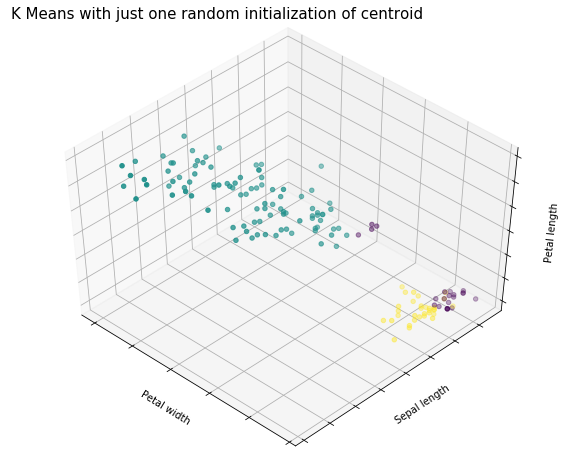

In [15]:
fig = plt.figure(figsize=(8, 6))
plt.clf()
ax4 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
bad_init_k_means.fit(X)
labels = bad_init_k_means.labels_

ax4.scatter3D(X[:, 3], X[:, 0], X[:, 2], c = labels.astype(np.float))
ax4.w_xaxis.set_ticklabels([])
ax4.w_yaxis.set_ticklabels([])
ax4.w_zaxis.set_ticklabels([])
ax4.set_xlabel('Petal width')
ax4.set_ylabel('Sepal length')
ax4.set_zlabel('Petal length')
ax4.set_title('K Means with just one random initialization of centroid', loc='left', fontsize=15)
plt.show()

Very possible for the clustering to get stuck in a local optima